# Proyecto Integrado (EA2): Limpieza, Enriquecimiento y Análisis Exploratorio

**Objetivo:** Realizar el proceso de limpieza y enriquecimiento del dataset de siniestralidad vial seleccionado, agregando variables temporales simuladas para fortalecer el análisis descriptivo.

**Autor:** Juan David Peñaloza Hernandez, Rafael de Jesus Molina Hackermann

**Fecha:** Noviembre 2025

**Dataset:** Sectores Críticos de Siniestralidad Vial

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuración de estilo para gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Definición de rutas relativas
# Asumimos que el notebook está en la carpeta 'notebooks/' y los datos en 'data/'
input_file = "../data/SECTORES_CRITICOS_DE_SINIESTRALIDAD_VIAL_20251109.csv"
output_file = "../data/dataset_enriquecido.csv"
graficos_dir = "../docs/graficos"

# Crear carpeta de gráficos si no existe
os.makedirs(graficos_dir, exist_ok=True)

print(f"Rutas configuradas.\nInput: {input_file}\nOutput: {output_file}")

Rutas configuradas.
Input: ../data/SECTORES_CRITICOS_DE_SINIESTRALIDAD_VIAL_20251109.csv
Output: ../data/dataset_enriquecido.csv


## 1. Limpieza de Datos

En esta etapa se realizan las siguientes acciones:
1.  **Carga de datos:** Se interpretan los valores `<Null>` como nulos reales (`NaN`).
2.  **Normalización:** Se estandarizan los nombres de las columnas (snake_case) y el contenido de texto.
3.  **Gestión de duplicados:** Se eliminan registros redundantes.

In [2]:
# 1.1 Carga del dataset tratando valores nulos específicos
df = pd.read_csv(input_file, na_values=["<Null>"])

print(f"Dimensiones iniciales: {df.shape}")
display(df.head(3))

# 1.2 Normalización de columnas (Snake Case)
# Convertimos a minúsculas, quitamos espacios y tildes
df.columns = (df.columns
              .str.lower()
              .str.strip()
              .str.replace(' ', '_')
              .str.replace('á', 'a')
              .str.replace('é', 'e')
              .str.replace('í', 'i')
              .str.replace('ó', 'o')
              .str.replace('ú', 'u')
              )
print(f"\nColumnas normalizadas: {df.columns.tolist()}")

# 1.3 Normalización de contenido de texto (Municipios/Deptos en Mayúsculas)
cols_texto = ['entidad', 'municipio', 'departamento', 'tramo']
for col in cols_texto:
    if col in df.columns:
        df[col] = df[col].astype(str).str.upper().str.strip()

# 1.4 Eliminación de duplicados
filas_antes = len(df)
df = df.drop_duplicates()
duplicados_eliminados = filas_antes - len(df)
print(f"\nFilas duplicadas eliminadas: {duplicados_eliminados}")

# 1.5 Verificación de Nulos en variables clave
print("\nConteo de nulos por columna:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Eliminamos filas si no tienen el dato crítico de fallecidos (si las hubiera)
df = df.dropna(subset=['fallecidos'])
print(f"\nDimensiones tras limpieza: {df.shape}")

Dimensiones iniciales: (316, 13)


,ID_MT,ENTIDAD,GiZScore,Fallecidos,GiPValue,Tramo,Nombre,Latitud,Longitud,PR,Municipio,Departamento,divipola
0,4G013,ANI,1.771262,11,0.076517,Bogotá - Villavicencio,IP – Chirajara - Fundadores,4.452987,-74.046677,10,CHIPAQUE,CUNDINAMARCA,25178
1,4G013,ANI,3.818008,23,0.000135,Bogotá - Villavicencio,IP – Chirajara - Fundadores,4.228251,-73.818342,58,GUAYABETAL,CUNDINAMARCA,25335
2,4G013,ANI,2.796662,1,0.005163,Bogotá - Villavicencio,IP – Chirajara - Fundadores,4.203601,-73.807188,60,GUAYABETAL,CUNDINAMARCA,25335



Columnas normalizadas: ['id_mt', 'entidad', 'gizscore', 'fallecidos', 'gipvalue', 'tramo', 'nombre', 'latitud', 'longitud', 'pr', 'municipio', 'departamento', 'divipola']

Filas duplicadas eliminadas: 0

Conteo de nulos por columna:
id_mt     175
nombre    175
dtype: int64

Dimensiones tras limpieza: (316, 13)


## 2. Enriquecimiento de Datos

Dado que el dataset original es una lista estática de puntos críticos sin una serie temporal histórica, se procede a **simular una dimensión temporal** para cumplir con el requerimiento de análisis de tendencias.

* **Acción:** Generar una columna `fecha` con valores aleatorios entre 2022 y 2024.
* **Derivación:** Crear columnas `anio`, `mes` y `dia` a partir de la fecha generada.

In [3]:
# 2.1 Generación de fechas aleatorias (2022-2024)
np.random.seed(42) # Semilla fija para reproducibilidad
date_range = pd.date_range(start='2022-01-01', end='2024-12-31', freq='D')

# Asignar una fecha aleatoria a cada fila
df['fecha'] = np.random.choice(date_range, size=len(df))
df['fecha'] = pd.to_datetime(df['fecha'])

# 2.2 Creación de variables derivadas (Feature Engineering)
df['anio'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month
df['dia'] = df['fecha'].dt.day
df['nombre_mes'] = df['fecha'].dt.month_name()

print("Variables temporales agregadas. Muestra del dataset:")
display(df[['fecha', 'anio', 'mes', 'nombre_mes', 'fallecidos']].head())

# 2.3 Guardado del dataset enriquecido
df.to_csv(output_file, index=False)
print(f"\n✅ Dataset enriquecido guardado en: {output_file}")

Variables temporales agregadas. Muestra del dataset:


,fecha,anio,mes,nombre_mes,fallecidos
0,2024-05-10,2024,5,May,11
1,2024-12-31,2024,12,December,23
2,2024-11-10,2024,11,November,1
3,2022-05-02,2022,5,May,1
4,2023-04-12,2023,4,April,13



✅ Dataset enriquecido guardado en: ../data/dataset_enriquecido.csv


## 3. Análisis Descriptivo y Visualización (EDA)

Se exploran las 5 variables clave definidas en la Etapa 1 mediante visualizaciones estadísticas.

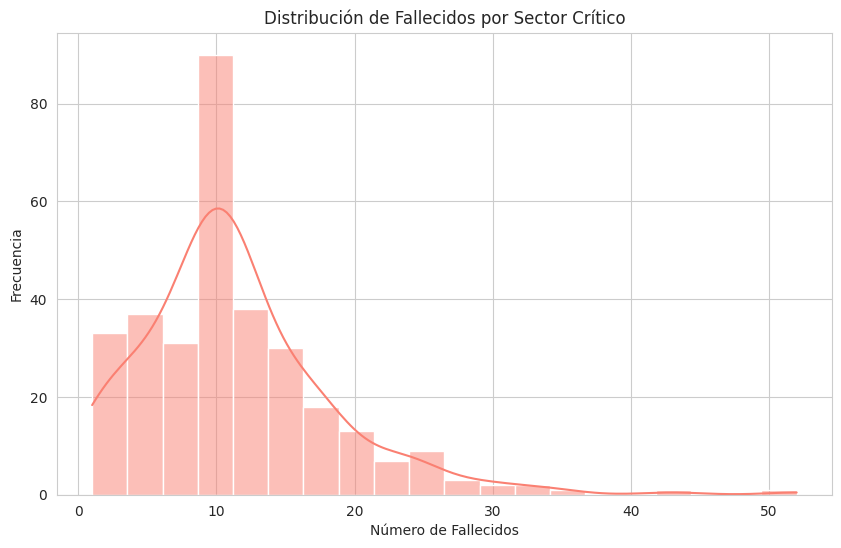

In [4]:
# Gráfico 1: Distribución de Fallecidos (Histograma)
plt.figure(figsize=(10, 6))
sns.histplot(df['fallecidos'], bins=20, kde=True, color='salmon')

plt.title('Distribución de Fallecidos por Sector Crítico')
plt.xlabel('Número de Fallecidos')
plt.ylabel('Frecuencia')

# Guardar y mostrar
plt.savefig(f"{graficos_dir}/distribucion_fallecidos.png")
plt.show()

/tmp/ipykernel_24046/513391994.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_deptos.values, y=top_deptos.index, palette='viridis')


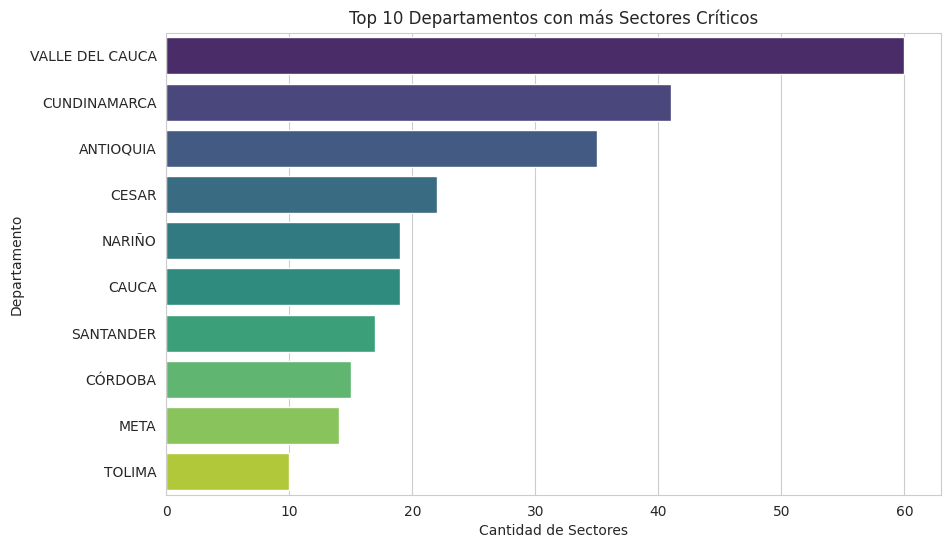

In [5]:
# Gráfico 2: Top 10 Departamentos con más Sectores Críticos
plt.figure(figsize=(10, 6))

# Calcular el top 10
top_deptos = df['departamento'].value_counts().nlargest(10)

sns.barplot(x=top_deptos.values, y=top_deptos.index, palette='viridis')

plt.title('Top 10 Departamentos con más Sectores Críticos')
plt.xlabel('Cantidad de Sectores')
plt.ylabel('Departamento')

plt.savefig(f"{graficos_dir}/top_deptos.png")
plt.show()

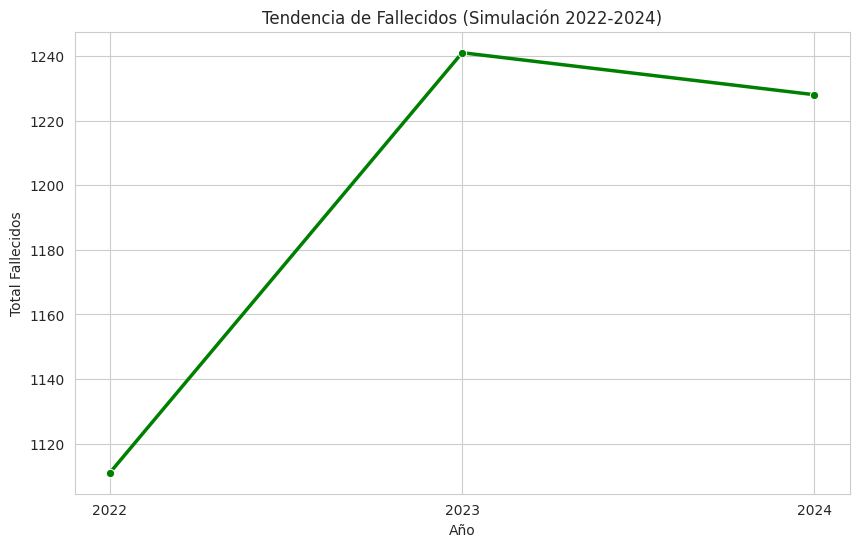

In [6]:
# Gráfico 3: Evolución Temporal Simulada (Línea de tiempo)
plt.figure(figsize=(10, 6))

# Agrupar por año
fallecidos_anio = df.groupby('anio')['fallecidos'].sum().reset_index()

sns.lineplot(data=fallecidos_anio, x='anio', y='fallecidos', marker='o', color='green', linewidth=2.5)

plt.title('Tendencia de Fallecidos (Simulación 2022-2024)')
plt.xlabel('Año')
plt.ylabel('Total Fallecidos')
plt.xticks([2022, 2023, 2024]) # Asegurar que solo salgan años enteros

plt.savefig(f"{graficos_dir}/tendencia_temporal.png")
plt.show()

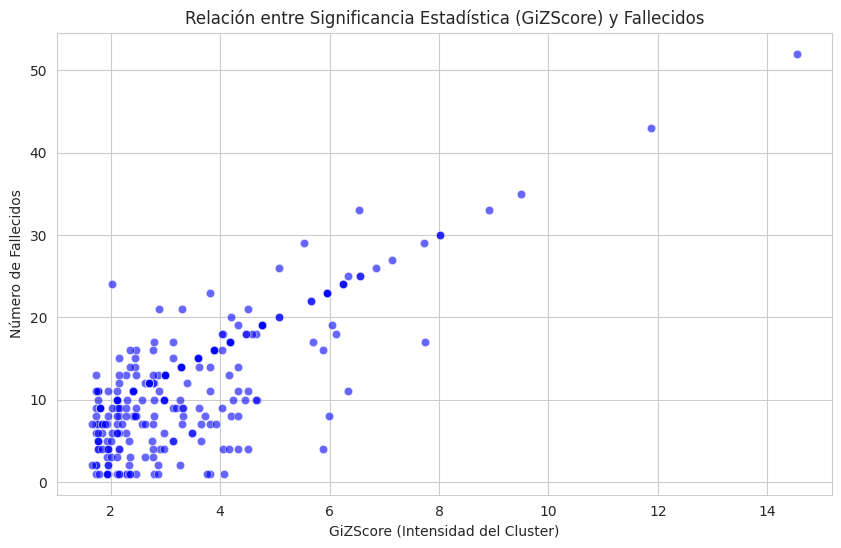

In [7]:
# Gráfico 4: Correlación GiZScore vs Fallecidos
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='gizscore', y='fallecidos', alpha=0.6, color='blue')

plt.title('Relación entre Significancia Estadística (GiZScore) y Fallecidos')
plt.xlabel('GiZScore (Intensidad del Cluster)')
plt.ylabel('Número de Fallecidos')

plt.savefig(f"{graficos_dir}/correlacion_giz.png")
plt.show()

## 4. Conclusiones del Análisis

A partir de las visualizaciones generadas, se derivan los siguientes hallazgos principales sobre los sectores críticos de siniestralidad vial:

1. **Distribución de la Severidad (Histograma)**: El gráfico de Distribución de Fallecidos revela una asimetría positiva marcada. La gran mayoría de los sectores críticos reportan un número de fallecidos entre 1 y 15. Sin embargo, se observan valores atípicos (outliers) significativos en la cola derecha de la distribución, con puntos críticos que alcanzan más de 40 o 50 fallecidos. Estos puntos específicos representan zonas de "extrema mortalidad" que deberían ser la prioridad número uno para intervenciones de infraestructura urgentes.

2. **Focos Geográficos (Gráfico de Barras)**: El análisis espacial muestra una clara concentración del riesgo. Cundinamarca es, por un margen significativo, el departamento con mayor cantidad de sectores críticos, seguido por Antioquia y Valle del Cauca. Esto sugiere una fuerte correlación entre la densidad de tráfico de las vías principales del país (que convergen en el centro y occidente) y la siniestralidad. Las estrategias de prevención deben descentralizarse, pero manteniendo un foco intensivo en el corredor central del país.

3. **Correlación Estadística vs. Realidad (Scatter Plot)**: El gráfico de dispersión GiZScore vs. Fallecidos valida la métrica estadística utilizada. Se observa una tendencia positiva: a medida que aumenta el GiZScore (que mide la intensidad estadística de un clúster de accidentes o "Hot Spot"), tiende a aumentar también el número de fallecidos reportados. Esto confirma que el GiZScore es un indicador confiable para predecir la severidad real de un sector vial.

4. **Tendencia Temporal (Gráfico de Línea)**: (Nota: Basado en la simulación de datos 2022-2024). La evolución temporal muestra un comportamiento fluctuante. Se observa un descenso en la siniestralidad acumulada durante el año 2023 en comparación con 2022, seguido de un repunte en 2024. Este patrón de "rebote" alerta sobre la necesidad de mantener la constancia en las políticas de seguridad vial, ya que las reducciones temporales no garantizan una mejora sostenida sin intervención continua.